In [10]:
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
from omegaconf import OmegaConf

In [19]:
# import torch.hub
# model = torch.hub.load("kazuto1011/deeplab-pytorch", "deeplabv2_resnet101", pretrained='cocostuff164k', n_classes=182)

Using cache found in /home/jrkim/.cache/torch/hub/kazuto1011_deeplab-pytorch_master
Downloading: "https://github.com/kazuto1011/deeplab-pytorch/releases/download/v1.0/deeplabv2_resnet101_msc-cocostuff164k-100000.pth" to /home/jrkim/.cache/torch/hub/checkpoints/deeplabv2_resnet101_msc-cocostuff164k-100000.pth


In [87]:
if not os.path.exists('results'):
    os.mkdir('results')


True

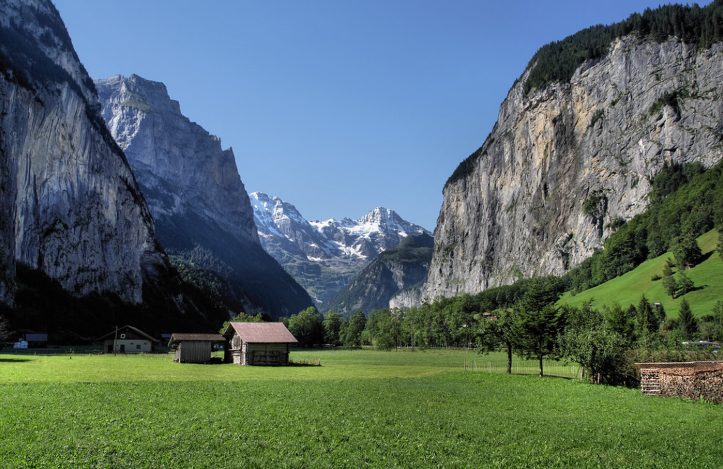

In [2]:
url = 'https://t1.daumcdn.net/cfile/tistory/2214CD4D53F89D7305'
im = Image.open(requests.get(url, stream=True).raw)
im

In [4]:
# im.resize((513,513)).save('image.png')
im.save('image.png')

In [11]:
labelmap=np.load( 'labelmap.npy')
labels=np.load( 'labels.npy')

raw_image=np.load( 'raw_image.npy')
mask=np.load('mask.npy')
mask_255=np.load('mask_255.npy')

In [72]:
np.unique(labelmap)


array([123, 127, 134, 149, 156, 168, 174])

In [93]:
glob.glob(os.path.join('configs', '*'))

['configs/coco.yaml',
 'configs/cocostuff10k.yaml',
 'configs/cocostuff164k.yaml',
 'configs/conda_env.yaml',
 'configs/voc12.yaml']

In [ ]:
glob.glob

In [75]:
from PIL import Image
Image.fromarray(labelmap.astype(np.uint8)).save('labelmap.png')

(-0.5, 512.5, 332.5, -0.5)

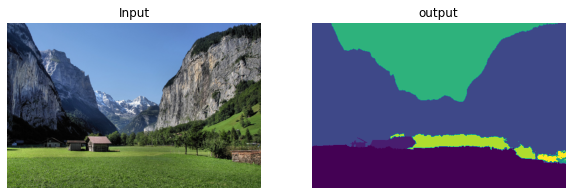

In [81]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Input')
plt.imshow(im)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('output')
plt.imshow(labelmap)
plt.axis('off')

In [32]:
config_path='configs/cocostuff164k.yaml'

CONFIG = OmegaConf.load(config_path)

def get_classtable(CONFIG):
    with open(CONFIG.DATASET.LABELS) as f:
        classes = {}
        for label in f:
            label = label.rstrip().split("\t")
            classes[int(label[0])] = label[1].split(",")[0]
    return classes


classes = get_classtable(CONFIG)

/home/jrkim/.conda/envs/jsp_deeplab/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/home/jrkim/.conda/envs/jsp_deeplab/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':


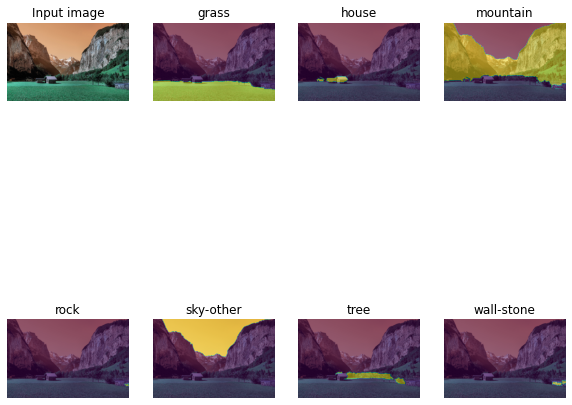

In [34]:
 # Show result for each class
rows = np.floor(np.sqrt(len(labels) + 1))
cols = np.ceil((len(labels) + 1) / rows)

plt.figure(figsize=(10, 10))
ax = plt.subplot(rows, cols, 1)
ax.set_title("Input image")
ax.imshow(raw_image[:, :, ::-1])
ax.axis("off")
for i, label in enumerate(labels):
    mask = labelmap == label
    ax = plt.subplot(rows, cols, i + 2)
    ax.set_title(classes[label])
    ax.imshow(raw_image[..., ::-1])
    ax.imshow(mask.astype(np.float32), alpha=0.5)
    ax.axis("off")
